<h2 align = "center"> Naive Bayes </h2>

* Bayes therom
* The likelihood of an event (one outcome of the trial) should be based on the evidence across multiple trials or opportunities for the events to occur 
* Dependent events are the basis for the predictive modeling. If two events are independnt, knowing one won't provide any information for knowing the other
* Laplace estimator. We might have the situation where one level of a categorical variable never shows up in the evidence but in the test data. If so, NB will assign the likelihood as 0 thus overruled other features. So one way to do that is to give every levels a prior (usually 1) to avoid these 0 likelihood situation. Or you can adjust the prior to reflect the prior belief between the feature and the outcome. In the frequency table, every cell gets an additional 1 first which means the total observations will increase correspondingly as well

P(outcome|feature)[posterial probability] = p(feature|outcome)[likelihood]*p(outcome)[prior probabilit]/p(feature)[marginal likelihood]

 Strenghts     | Weakness
  ------------- | -------------
  1) Simple, fast and easy <br/> 2) handle missing values and noise well <br/>3) require few examples for training  <br/> easy to obtain the probability prediction <br/> 4) given all the constraints, still perform pretty well bc we are interested in the class not the probability| 1) rely on equally important and independent features <br/>2) Not ideal for the data with a lot of numeric variables (dicretizing the variable will cause the loss of information)  <br/> 3)The probability is not accurate as the predicted class

In [11]:
data = readLines("./smsspamcollection/SMSSpamCollection.txt")

In [12]:
library(stringr)

In [28]:
dataList = sapply(data, function(x)str_split(x, "\t"))

In [33]:
sms_raw = data.frame(type = sapply(dataList, function(x)x[1]), text = sapply(dataList, function(x)x[2]))

In [36]:
sms_raw$type = as.factor(sms_raw$type)

In [37]:
library(tm)

Loading required package: NLP


In [38]:
# Creating corpus (collection of text documents)
sms_corpus = VCorpus (VectorSource(sms_raw$text))

In [39]:
vignette("tm")

In [40]:
print(sms_corpus) #corpus is essentially a complex list

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5574


In [41]:
inspect(sms_corpus[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 111

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 29



In [42]:
as.character(sms_corpus[[1]])

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

## Clean up the Text data

* Order matters a lot in the cleaning up like whether to stem first or to remove the punctuation first,

### Lower all the words

In [44]:
# tm_map (apply transformation to the corpus)
sms_corpus_clean = tm_map(sms_corpus, content_transformer(tolower))

In [45]:
as.character(sms_corpus_clean[[1]])

[1] "go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."

In [46]:
getTransformations() # These mapping functions don't require the wrapper such as the content_transformer

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

### Remove Numbers

In [47]:
sms_corpus_clean = tm_map(sms_corpus_clean, removeNumbers)

In [50]:
stopwords()

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

### Remove Stopwords

In [51]:
sms_corpus_clean = tm_map(sms_corpus_clean, removeWords, stopwords() )

### Remove Punctuation

In [52]:
sms_corpus_clean = tm_map(sms_corpus_clean, removePunctuation )

### Stem the words

In [54]:
### Reduce the word to its root form (stemming )
library(SnowballC)

In [55]:
wordStem(c("word", "learning", "learned"))

[1] "word"  "learn" "learn"

In [56]:
sms_corpus_clean = tm_map(sms_corpus_clean, stemDocument )

### Delete the white space

In [58]:
sms_corpus_clean = tm_map(sms_corpus_clean, stripWhitespace )

In [62]:
as.character(sms_corpus_clean[1:3][[3]])

[1] "free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli s"

### Tokenization. Split the text documents to the words. (A token a simple word/text string)

#### Term document matrix is for each row, it is a document and for each column it is a word/token

In [63]:
sms_dtm = DocumentTermMatrix(sms_corpus_clean)

## Preparing the data

In [67]:
sms_train_labels = sms_raw[1:4169,]$type
sms_test_labels = sms_raw[4170:5559, ]$type 

In [69]:
prop.table(table(sms_train_labels))

sms_train_labels
      ham      spam 
0.8647158 0.1352842 

In [70]:
prop.table(table(sms_test_labels))

sms_test_labels
      ham      spam 
0.8697842 0.1302158 

In [79]:
sms_dtm_train  = sms_dtm[1:4169,]
sms_dtm_test = sms_dtm[4170:5559,]

### Find the most frequent word

In [72]:
library(wordcloud) # Different randomization will make the cloud differently so we choose the best for presentation

Loading required package: RColorBrewer


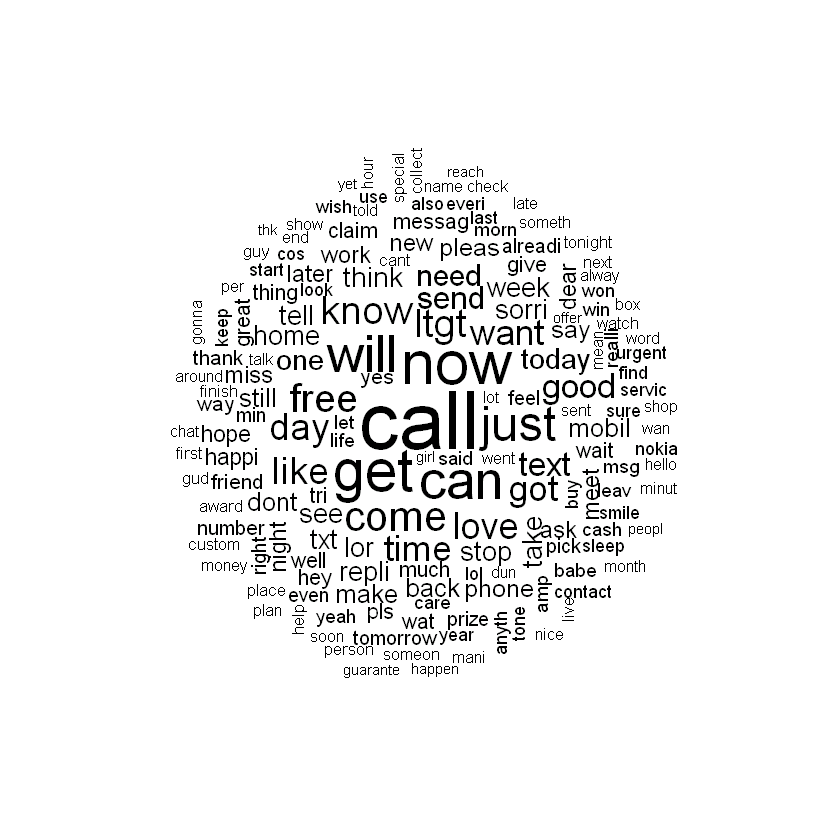

In [73]:
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE # high frequency values being placed in the middle of the center)

In [74]:
ham = subset(sms_raw, type == "ham")
spam = subset(sms_raw, type == "spam")

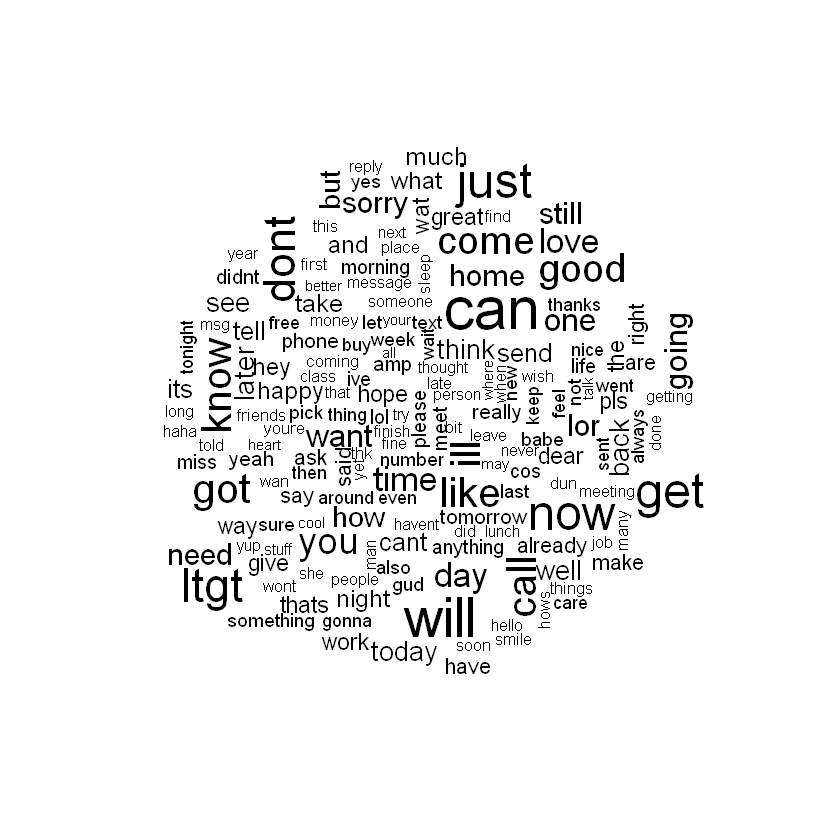

In [78]:
wordcloud(ham$text, min.freq = 40, scale = c(3,0.5)) # scales can help to fit the word into the picture

In [81]:
sms_freq_word = findFreqTerms(sms_dtm_train, 5)

In [82]:
sms_dtm_train_freq = sms_dtm_train[,sms_freq_word]

In [83]:
sms_dtm_test_freq = sms_dtm_test[,sms_freq_word]

### Conver the numeric to the Yes/No strings

In [84]:
count_convert = function(x){
    x = ifelse(x >0, "yes", "no")
}

In [86]:
sms_train = apply(sms_dtm_train_freq,2, count_convert)

In [87]:
sms_test = apply(sms_dtm_test_freq,2, count_convert)

In [88]:
library(e1071)

In [91]:
sms_classifier = naiveBayes(sms_train, sms_train_labels)

In [92]:
sms_predict = predict(sms_classifier, sms_test)

In [93]:
library(gmodels)

In [94]:
CrossTable(sms_predict, sms_test_labels, prop.chisq = FALSE, prop.t = FALSE, dnn = c("predict", "actual")) 
# The incorrectly classified as spam might have huge impact as the person might miss an important message


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
     predict |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1200 |        20 |      1220 | 
             |     0.984 |     0.016 |     0.878 | 
             |     0.993 |     0.110 |           | 
-------------|-----------|-----------|-----------|
        spam |         9 |       161 |       170 | 
             |     0.053 |     0.947 |     0.122 | 
             |     0.007 |     0.890 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1209 |       181 |      1390 | 
             |     0.870 |     0.130 |           | 
-------------|-----------|-----------|-----------|

 


In [95]:
sms_classifier2 = naiveBayes(sms_train, sms_train_labels, laplace = 1)